## Keras CNN으로 패션 아이템 구분하기 ##

### 1. 패키지 수입 및 파라미터 지정

In [1]:
# 패키지 수입
import matplotlib.pyplot as plt
import numpy as np

from time import time
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils import np_utils

from keras.layers import Flatten, Dense, MaxPool2D, Conv2D, InputLayer

In [2]:
# 파라미터
MY_EPOCH = 300
MY_BATCH = 100

### 2. 데이터 처리

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('학습용 입력 데이터: ', X_train.shape)
print('학습용 출력 데이터: ', Y_train.shape)

print('평가용 입력 데이터: ', X_test.shape)
print('평가용 출력 데이터: ', Y_test.shape)

학습용 입력 데이터:  (60000, 28, 28)
학습용 출력 데이터:  (60000,)
평가용 입력 데이터:  (10000, 28, 28)
평가용 출력 데이터:  (10000,)


학습용 데이터 첫 번째 이미지 화소 정보
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1

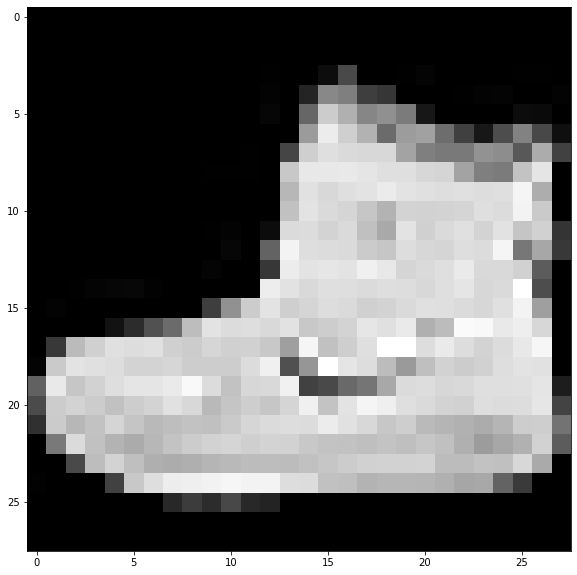

In [4]:
# 데이터 샘플 출력
print('학습용 데이터 첫 번째 이미지 화소 정보')
print(X_train[0])
plt.figure(figsize=(10,10))
plt.imshow(X_train[0], cmap='gray')
print('\n학습용 데이터 첫 번째 이미지의 라벨: ', Y_train[0])

In [5]:
# 데이터 스케일링
X_train = X_train / 255.0
print(X_train[0])
X_test = X_test / 255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [6]:
# 데이터 모양 정보 전환 (이미지 채널 정보 추가)
X_train = X_train.reshape(60000, 28, 28, 1) # 1은 채널
X_test = X_test.reshape(10000, 28, 28, 1)

# 라벨 정보 수정
Y_train = np_utils.to_categorical(Y_train, 10)
print('\n학습용 데이터 첫 번째 이미지의 라벨: ', Y_train[0]) # one-hot 인코딩
Y_test = np_utils.to_categorical(Y_test, 10)

print('학습용 입력 데이터: ', X_train.shape)
print('학습용 출력 데이터: ', Y_train.shape)

print('평가용 입력 데이터: ', X_test.shape)
print('평가용 출력 데이터: ', Y_test.shape)


학습용 데이터 첫 번째 이미지의 라벨:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
학습용 입력 데이터:  (60000, 28, 28, 1)
학습용 출력 데이터:  (60000, 10)
평가용 입력 데이터:  (10000, 28, 28, 1)
평가용 출력 데이터:  (10000, 10)


### 3. 인공 신경망 구현

In [7]:
# CNN 구현
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))

# 첫 번째 합성곱 블럭
model.add(Conv2D(filters=32, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# 두 번째 합성곱 블럭
model.add(Conv2D(filters=64, 
                 kernel_size=2, 
                 padding='same', 
                 activation='relu'))

model.add(MaxPool2D(pool_size=2))

# DNN 입성
model.add(Flatten())

model.add(Dense(units=128, 
                activation='relu'))

model.add(Dense(units=10,
                activation='softmax'))

print('CNN 요약')
model.summary()

CNN 요약
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)          

### 4. 인공 신경망 학습

In [8]:
# 학습 방식 결정
model.compile(optimizer='adam', # adam, sgd
              loss='categorical_crossentropy', # categorical_crossentropy, mae
              metrics=['acc'])

# CNN 학습
print('학습 시작')
begin = time()

model.fit(x=X_train, 
          y=Y_train, 
          epochs=MY_EPOCH, 
          batch_size=MY_BATCH, 
          verbose=1)

end = time()
print('학습 시간: {:.2f}'.format(end-begin))

학습 시작
Epoch 1/300
600/600 [==============================] - 4s 3ms/step - loss: 0.6752 - acc: 0.7645
Epoch 2/300
600/600 [==============================] - 2s 3ms/step - loss: 0.3325 - acc: 0.8801
Epoch 3/300
600/600 [==============================] - 2s 3ms/step - loss: 0.2792 - acc: 0.8998
Epoch 4/300
600/600 [==============================] - 2s 3ms/step - loss: 0.2440 - acc: 0.9093
Epoch 5/300
600/600 [==============================] - 1s 2ms/step - loss: 0.2222 - acc: 0.9168
Epoch 6/300
600/600 [==============================] - 2s 3ms/step - loss: 0.2002 - acc: 0.9276
Epoch 7/300
600/600 [==============================] - 2s 3ms/step - loss: 0.1803 - acc: 0.9337
Epoch 8/300
600/600 [==============================] - 2s 3ms/step - loss: 0.1697 - acc: 0.9387
Epoch 9/300
600/600 [==============================] - 2s 3ms/step - loss: 0.1539 - acc: 0.9436
Epoch 10/300
600/600 [==============================] - 2s 3ms/step - loss: 0.1341 - acc: 0.9513
Epoch 11/300
600/600 [===========

### 5. CNN 평가

In [9]:
# CNN 평가
score = model.evaluate(x=X_test, 
                       y=Y_test, 
                       verbose=1)

print('최종 손실 값: {:.2f}'.format(score[0]))
print('최종 정확도: {:.2f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 2.0099 - acc: 0.9198
최종 손실 값: 2.01
최종 정확도: 0.92


### 6. CNN 예측

In [10]:
# 샘플 이미지 지정
image = X_test[1234]
print(image.shape)

# batch 정보 추가
image = image.reshape(1, 28, 28, 1)
pred = model.predict(image)

# 정보 출력
print('CNN 예측 값: ', pred)
print('정답: ', Y_test[1234])

(28, 28, 1)
CNN 예측 값:  [[8.0323523e-28 0.0000000e+00 9.9994218e-01 0.0000000e+00 5.7799618e-05
  0.0000000e+00 1.6886728e-14 0.0000000e+00 0.0000000e+00 1.4256447e-32]]
정답:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


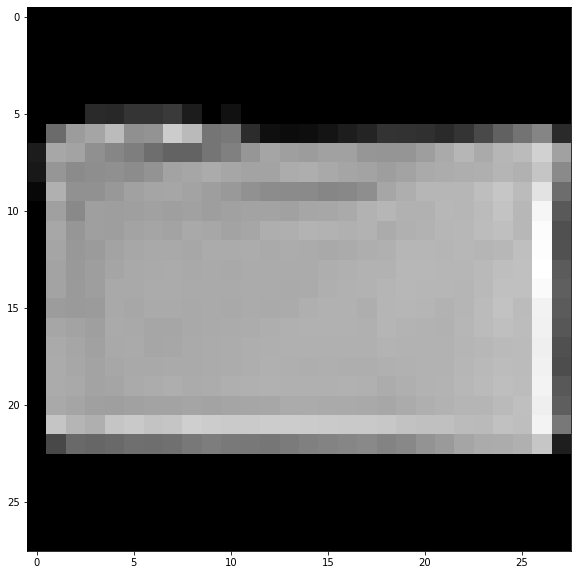

In [11]:
plt.figure(figsize=(10,10))
tmp = X_train[1234].reshape(28,28)
tmp = tmp * 255
plt.imshow(tmp, cmap='gray')

### GPU 확인

In [12]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Jan 10 15:17:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    42W / 300W |   1127MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------